In [16]:
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import transformers
from transformers import pipeline

In [17]:
data = pd.read_csv("book_reviews_sample.csv")

In [18]:
data.head()

,index,reviewText,rating
0,11494,Clean and funny. A bit busy with all the diffe...,3
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4
2,1463,Good thing that this is a free story. I read i...,1
3,10342,"Action, action, action! Equipment keeps gettin...",4
4,5256,this was hands down the worse book i have ever...,1


In [19]:
data['reviewText'][0]

'Clean and funny. A bit busy with all the different plots going on. But overall a good read. Bye now.'

In [20]:
data['reviewText_clean'] = data['reviewText'].str.lower()

In [23]:
data['reviewText_clean'] = data['reviewText_clean'].apply(lambda x: re.sub(r"([^\w\s])","",str(x)))

In [24]:
data.head()

,index,reviewText,rating,reviewText_clean
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...


In [25]:
vader = SentimentIntensityAnalyzer()

In [26]:
data['vader_sentiment_score'] = data['reviewText_clean'].apply(lambda x: vader.polarity_scores(x)['compound'])

In [27]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767


In [28]:
bins = [-1,-0.1,0.1,1]
names  = ['negative','neutral','postive']

data['vader_label'] = pd.cut(data['vader_sentiment_score'],bins,labels=names)

In [29]:
data.head()

,index,reviewText,rating,reviewText_clean,vader_sentiment_score,vader_label
0,11494,Clean and funny. A bit busy with all the diffe...,3,clean and funny a bit busy with all the differ...,0.7684,postive
1,984,Alex a sexy hot cop and the PhD candidate. Wha...,4,alex a sexy hot cop and the phd candidate what...,0.9325,postive
2,1463,Good thing that this is a free story. I read i...,1,good thing that this is a free story i read it...,0.6740,postive
3,10342,"Action, action, action! Equipment keeps gettin...",4,action action action equipment keeps getting b...,0.6652,postive
4,5256,this was hands down the worse book i have ever...,1,this was hands down the worse book i have ever...,-0.4767,negative


<Axes: xlabel='vader_label'>

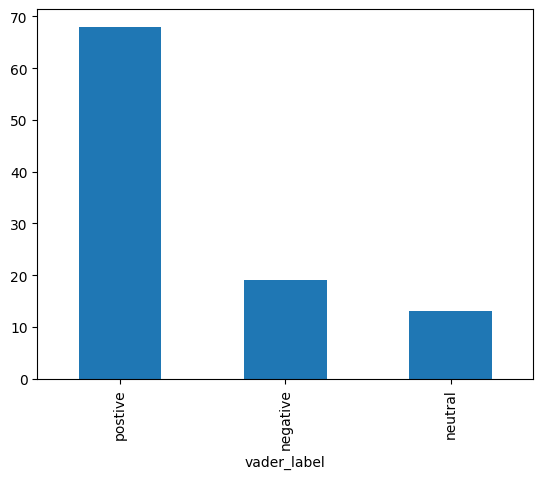

In [31]:
data['vader_label'].value_counts().plot.bar()

In [32]:
transformers_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [34]:
data['vader_label'].values

['postive', 'postive', 'postive', 'postive', 'negative', ..., 'postive', 'postive', 'postive', 'postive', 'postive']
Length: 100
Categories (3, object): ['negative' < 'neutral' < 'postive']

In [35]:
transformer_labels = []

for review in data['reviewText_clean'].values:
    sentiment_list = transformers_pipeline(review)
    sentiment_label = [ sent['label'] for sent in sentiment_list]
    transformer_labels.append(sentiment_label)

data['transfomer_sentiment_label'] = transformer_labels



<Axes: xlabel='transfomer_sentiment_label'>

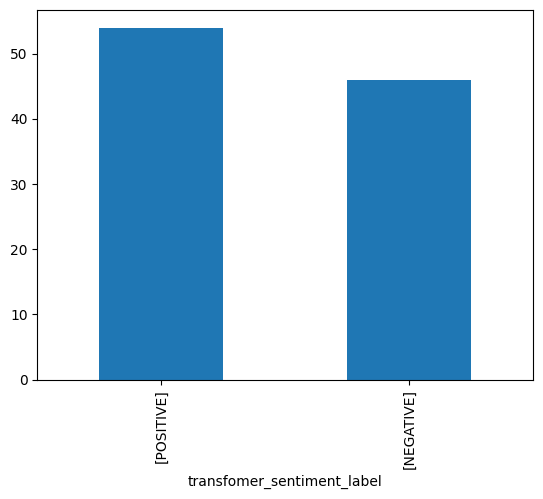

In [36]:
data['transfomer_sentiment_label'].value_counts().plot.bar()